In [1]:
import matplotlib.pyplot as plt
from density_estimation import LongishEnv, collect_samples, sample, DensityEstimator
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

/home/tomasruiz/miniconda3/envs/dads-env/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [2]:
env = LongishEnv()
buffer = collect_samples(env=env, num_episodes=100)

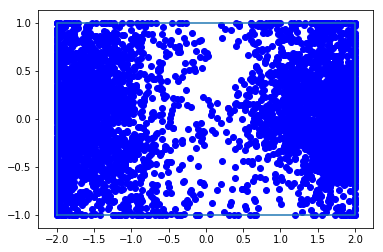

In [3]:
samples = buffer
env.render("human", more_pts=dict(blue=samples))

In [4]:
model = DensityEstimator(
    input_dim=env.observation_space.shape[0], vae_training_batch_size=32,
    samples_generator=lambda n: sample(buffer, n)
)
model.VAE.load_weights("density-model-ckpt/")

Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.


In [5]:
probs = model.get_input_density(samples)

In [6]:
ws = (1 / probs).numpy().astype(np.float64)
resamples_indices = np.random.choice(range(len(samples)), size=len(samples), replace=True, p=ws / sum(ws))
resamples = samples[resamples_indices]

In [7]:
df_buffer = pd.DataFrame(data=dict(x=samples[:, 0], y=samples[:, 1], distribution="buffer"))
df_resampled = pd.DataFrame(data=dict(x=resamples[:, 0], y=resamples[:, 1], distribution="resampling"))
density_plot_data = pd.concat([df_buffer, df_resampled])

/home/tomasruiz/miniconda3/envs/dads-env/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/tomasruiz/miniconda3/envs/dads-env/lib/python3.6/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/tomasruiz/miniconda3/envs/dads-env/lib/python3.6/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/tomasruiz/miniconda3/envs/dads-env/lib/python3.6/site-packages/matplotlib/cbook/__init_

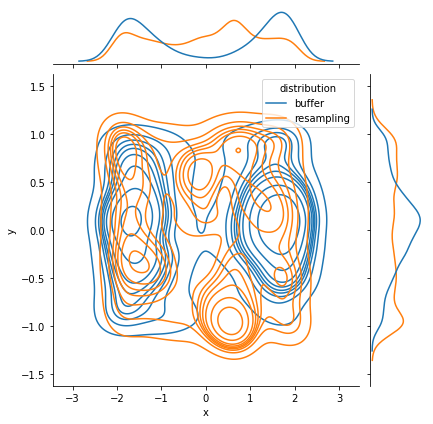

In [8]:
sns.jointplot(data=density_plot_data, x="x", y="y", hue="distribution", kind="kde")